<a href="https://colab.research.google.com/github/jblcky/retail-inventory-forecasting-2/blob/main/notebooks/eda_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load data

In [3]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
url = 'https://raw.githubusercontent.com/jblcky/retail-inventory-forecasting-2/refs/heads/main/data/processed/sales_df_fe.csv'
# Load processed file
sales_df = pd.read_csv(url, parse_dates=["date"])

Overall Sales Trend Over Time
- Why: Understand overall sales trends and spikes.

<ipython-input-16-17577a7443c9>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


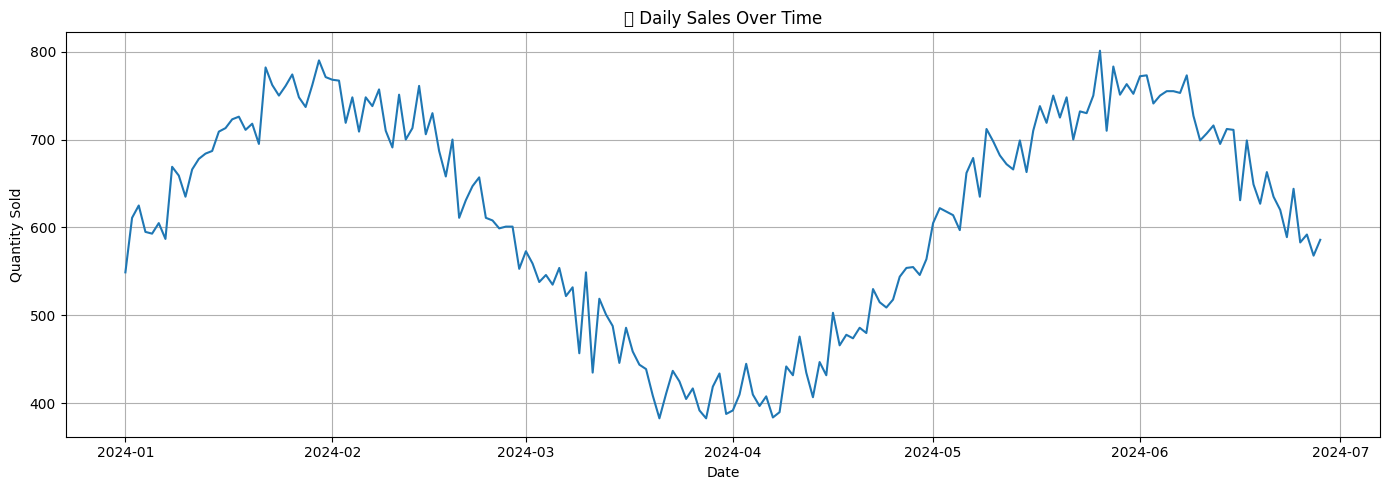

In [16]:
# Group total sales per day
daily_sales = sales_df.groupby('date')['quantity_sold'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(daily_sales['date'], daily_sales['quantity_sold'], label='Total Daily Sales')
plt.title("📈 Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


Seasonality by Day of Week
- Why: Helps in adjusting forecasts by weekday patterns.

<ipython-input-17-425962befd85>:12: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


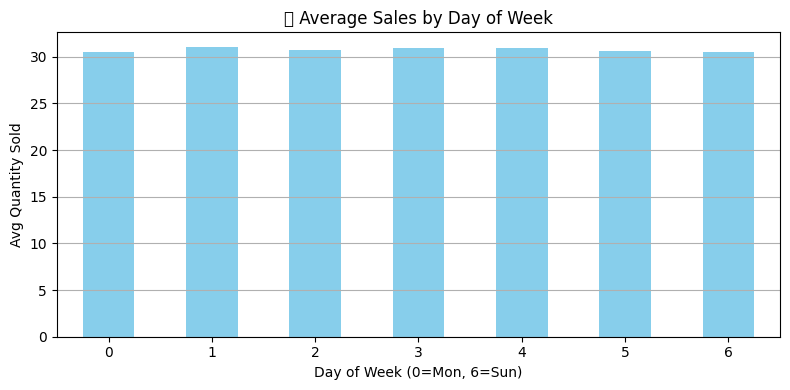

In [17]:
# Average sales by day of week
dow_sales = sales_df.groupby('day_of_week')['quantity_sold'].mean()

# Plot
plt.figure(figsize=(8, 4))
dow_sales.plot(kind='bar', color='skyblue')
plt.title("🗓️ Average Sales by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Avg Quantity Sold")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Sales Distribution by SKU
- Why: Identify best-sellers that need better forecasting/inventory.

<ipython-input-18-66d49289a898>:12: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


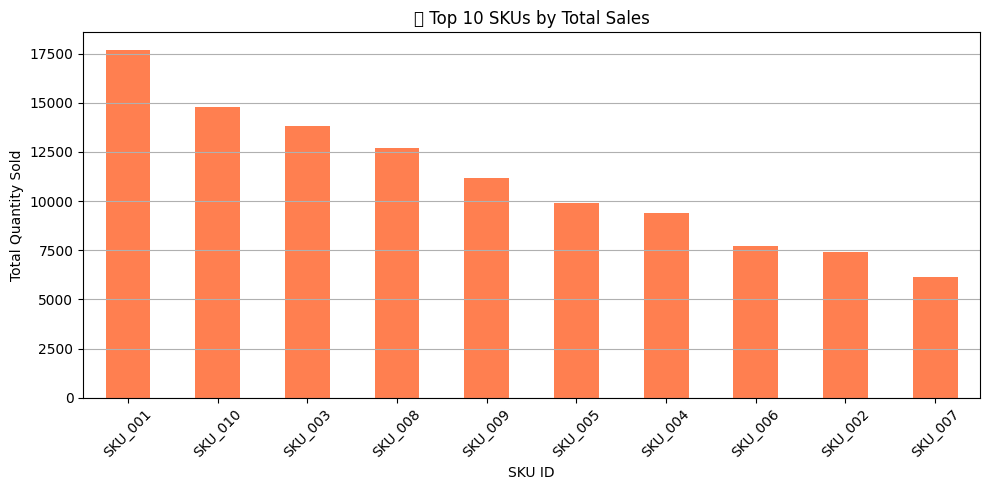

In [18]:
# Total sales per SKU
sku_sales = sales_df.groupby('sku_id')['quantity_sold'].sum().sort_values(ascending=False)

# Plot top 10 SKUs
plt.figure(figsize=(10, 5))
sku_sales.head(10).plot(kind='bar', color='coral')
plt.title("🔟 Top 10 SKUs by Total Sales")
plt.xlabel("SKU ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Compare Sales Trend for a Specific SKU Across Stores
- Why: Spot store-specific demand trends or differences.

<ipython-input-19-ad0de6fc7f2f>:17: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


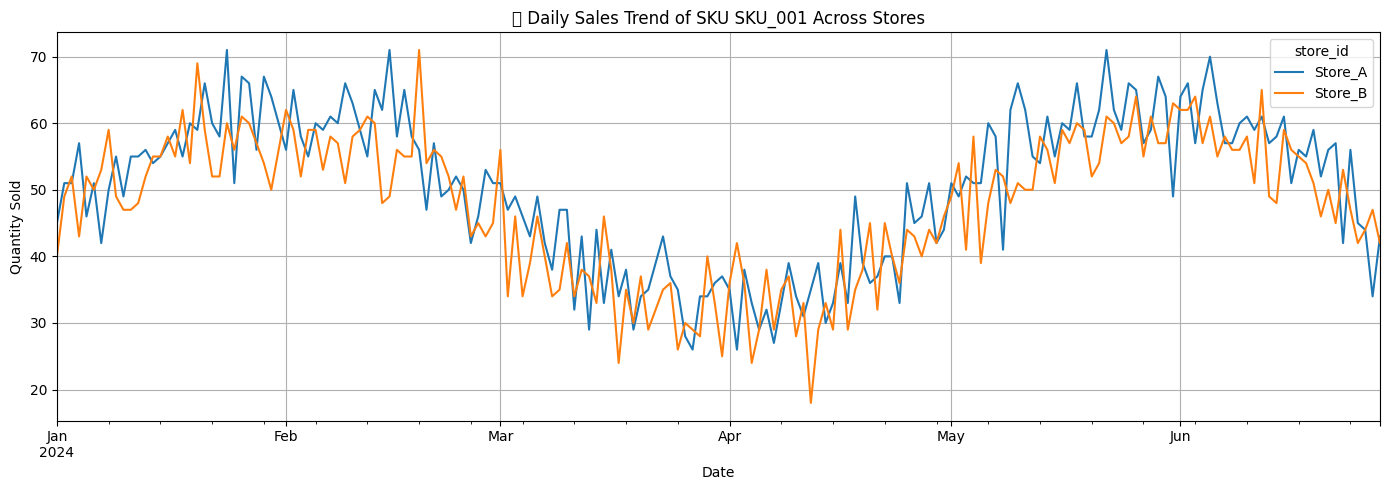

In [19]:
# Choose a SKU to compare
sku_to_plot = sales_df['sku_id'].unique()[0]

# Pivot for line plot
sku_store_trend = (
    sales_df[sales_df['sku_id'] == sku_to_plot]
    .groupby(['date', 'store_id'])['quantity_sold']
    .sum().unstack()
)

# Plot
sku_store_trend.plot(figsize=(14, 5))
plt.title(f"🏪 Daily Sales Trend of SKU {sku_to_plot} Across Stores")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


 Impact of Holidays or Flu Season
 - Why: Understand external event influence on demand.

In [21]:
# Compare avg sales on flu vs non-flu days
if 'event_flu_season' in sales_df.columns:
    flu_vs_nonflu = sales_df.groupby('event_flu_season')['quantity_sold'].mean()

    plt.figure(figsize=(6, 4))
    flu_vs_nonflu.plot(kind='bar', color=['lightgreen', 'salmon'])
    plt.title("😷 Average Sales on Flu vs Non-Flu Days")
    plt.xticks(ticks=[0, 1], labels=["No Flu", "Flu Season"], rotation=0)
    plt.ylabel("Avg Quantity Sold")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
